# <font style = "color:rgb(50,120,229)">What is a Blob?</font>

<img src="https://www.learnopencv.com/wp-content/uploads/2015/02/blob_detection.jpg">

A Blob is a group of connected pixels in an image that share some common property ( E.g grayscale value ). In the image above, the dark connected regions are blobs, and the goal of blob detection is to identify and mark these regions.

## <font style = "color:rgb(50,120,229)">Simple Blob Detector Example</font>
OpenCV provides a convenient way to detect blobs and filter them based on different characteristics. Let’s start with the simplest example.

In [1]:
# Standard imports
import cv2
import numpy as np;
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)
matplotlib.rcParams['image.cmap'] = 'gray'

Let us detect the blobs in the given image and display them on the image.

In this example, We find the position ( x,y coordinates) of the blob, and the radius of the blob.  

In [6]:
# Read image
im = cv2.imread(DATA_PATH + "images/blob_detection.jpg", cv2.IMREAD_GRAYSCALE)
 
# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create()

keypoints = detector.detect(im)

im = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)
 
# Mark blobs using image annotation concepts we have studied so far
for k in keypoints:
    x,y = k.pt
    x=int(round(x))
    y=int(round(y))
    # Mark center in BLACK
    cv2.circle(im,(x,y),5,(0,0,0),-1)
    # Get radius of blob
    diameter = k.size
    radius = int(round(diameter/2))
    # Mark blob in RED
    cv2.circle(im,(x,y),radius,(0,0,255),2)

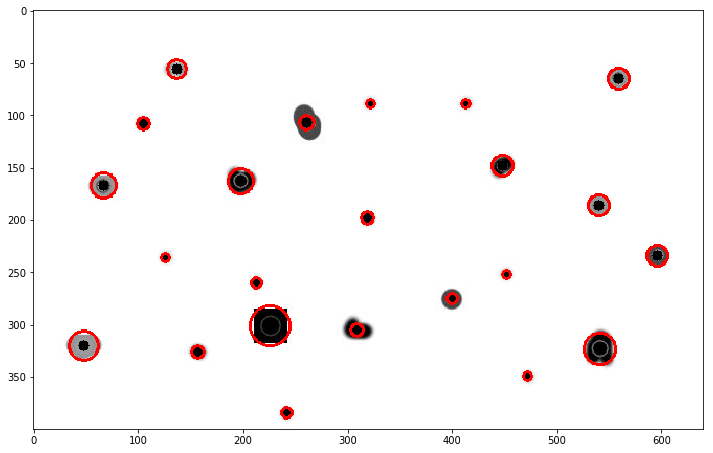

In [7]:
# Let's see what image we are dealing with
plt.imshow(im[:,:,::-1])

# <font style = "color:rgb(50,120,229)">How does Blob detection work ?</font>

SimpleBlobDetector, as the name implies, is based on a rather simple algorithm described below. The algorithm is controlled by parameters ( shown in bold below )  and has the following steps. 

1. **Thresholding** : Convert the source images to several binary images by thresholding the source image with thresholds starting at minThreshold. These thresholds are incremented  by thresholdStep until maxThreshold. So the first threshold is minThreshold, the second is minThreshold + thresholdStep, the third is minThreshold + 2 x thresholdStep, and so on.
2. **Grouping** : In each binary image,  connected white pixels are grouped together.  Let’s call these binary blobs.
3. **Merging**  : The centers of the binary blobs in the binary images are computed, and  blobs located closer than minDistBetweenBlobs are merged.
4. **Center & Radius Calculation** :  The centers and radii of the new merged blobs are computed and returned.

# <font style = "color:rgb(50,120,229)">Filtering Blobs by Color, Size and Shape</font>

<img src="https://www.learnopencv.com/wp-content/uploads/2015/02/BlobTest.jpg">

The parameters for SimpleBlobDetector can be set to filter the type of blobs we want.

- **By Color** : First you need to set filterByColor = 1. Set blobColor = 0 to select darker blobs, and blobColor = 255 for lighter blobs. 
- **By Size** :  You can filter the blobs based on size by setting the parameters filterByArea = 1, and appropriate values for minArea and maxArea. E.g. setting minArea = 100 will filter out all the blobs that have less then 100 pixels.
- **By Shape** : Now shape has three different parameters.
- **Circularity** :  This just measures how close to a circle the blob is. E.g. a regular hexagon has higher circularity than say a square. To filter by circularity, set filterByCircularity = 1.  Then set appropriate values for minCircularity and maxCircularity.
 
 $$\text{Circularity} = \frac{4\pi\times \text{Area}}
{(\text{perimeter})^2}$$

    This means that a circle has a circularity of 1, circularity of a square is 0.785, and so on.

- **Convexity** : A picture is worth a thousand words.  Convexity is defined as the (Area of the Blob / Area of it’s convex hull). Now, Convex Hull of a shape is the tightest convex shape that completely encloses the shape.  To filter by convexity, set filterByConvexity = 1, followed by setting 0 ≤ minConvexity ≤ 1 and maxConvexity ( ≤ 1) 
- **Inertia Ratio** : Don’t let this scare you. Mathematicians often use confusing words to describe something very simple. All you have to know is that this measures how elongated a shape is. E.g. for a circle, this value is 1, for an ellipse it is between 0 and 1, and for a line it is 0. To filter by inertia ratio, set filterByInertia = 1, and set 0 ≤ minInertiaRatio ≤ 1 and maxInertiaRatio (≤ 1 ) appropriately.

![](../data/images/Convexity.png)

![](../data/images/BlobTest.jpg)

# <font style = "color:rgb(50,120,229)">How to set SimpleBlobDetector params in OpenCV?</font>

Setting parameters for SimpleBlobDetector is easy. Here is an example.

In [5]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200
 
# Filter by Area.
params.filterByArea = True
params.minArea = 1500
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
 
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87
 
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01
 
# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

Please play around with these parameters to see how the output changes. Also, you will be using these parameters in the assignment which follows this week.